# System's divergence
This notebook calculates the divergence of the autonomous system and generates heat maps for it. Since the divergence depends only on three of the system's state variables, two variables from C, M, and D must be chosen for each simulation and assigned to var_x and var_y, while the third variable is given a default value corresponding to the value the variable assumes in the steady state of the system with the initial conditions provided by the paper.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import configparser

### Function to retrieve information from the configuration file

In [19]:
def extract_values(section_name, config):
    values = []
    if section_name in config:
        for key, value in config[section_name].items():
            values.append(float(value))
    else:
        print(f'Section "{section_name}" is not in the configuration file')
    return values

### Divergence of the vector field

In [86]:
def divergence(var1, var2, x, y, z, par):
    
    k3, k4, k5, k6, d_H, d_C, d_M, d_D = par

    div = np.zeros_like(x)

    if var1 == 'C':
        C = x
        if var2 == 'M':
            M = y
            D = z
        elif var2 == 'D':
            D = y
            M = z
    elif var1 == 'M':
        M = x
        if var2 == 'C':
            C = y
            D = z
        elif var2 == 'D':
            D = y
            C = z
    elif var1 == 'D':
        D = x
        if var2 == 'C':
            C = y
            M = z
        elif var2 == 'M':
            M = y
            C = z

    div = -(d_H + d_C + d_M + d_D + k4 + k3 * D + k5 * C + k6 * M)  
    return div

The following values are those found for the stationary state when varying the initial conditions of H, C, and M, respectively.
They are noted here for a subsequent development of the code in which a different value will be assigned to the third variable; these ranges can provide an idea of which values would be sensible to explore.

C stationary values:
[(50-450), (50-550), (0, 65)]

M stationary values:
[(21000-31000), (20000-32000), (0, 100000)]

D stationary values:
[(1.000-1.006), (0.098-1.006), (0, 1.1)]

var1=D, var2=M


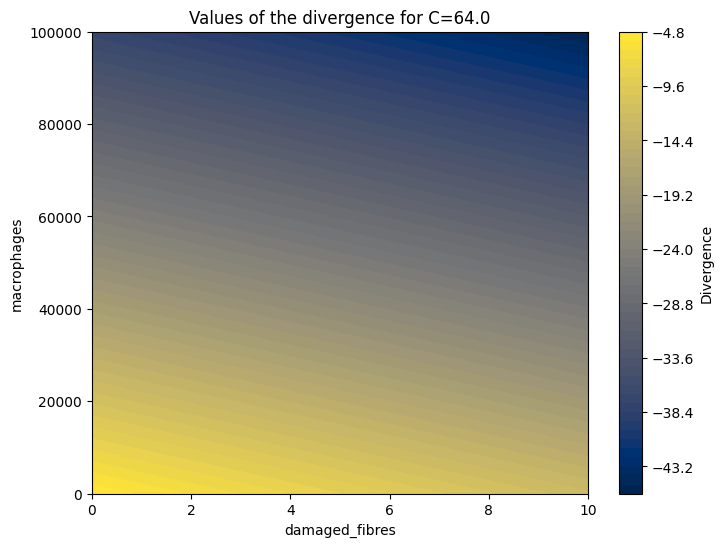

In [ ]:
config = configparser.ConfigParser()
config.read('config_heat_map.ini')

par = extract_values('parameters', config)

bounds = [(0, 500), (0, 100000), (0, 10)]
default_values = [64., 21619., 1.]
labels = ['CD8_T_cells', 'macrophages', 'damaged_fibres']
var_map = {
    'C': 0,
    'M': 1,
    'D': 2
}

var_x = 'D'
var_y = 'M'

grid_steps = 1000
x_range = np.linspace(*bounds[var_map[var_x]], grid_steps)
y_range = np.linspace(*bounds[var_map[var_y]], grid_steps)

x, y = np.meshgrid(x_range, y_range)

z = list(var_map.keys() - set([var_x, var_y]))[0]
default_value_z = default_values[var_map[z]]

div = divergence(var_x, var_y, x, y, default_value_z, par)
    
plt.figure(figsize=(8, 6))
plt.contourf(x, y, div, levels=50, cmap='cividis')
plt.colorbar(label='Divergence')
plt.xlabel(f'{labels[var_map[var_x]]}')
plt.ylabel(f'{labels[var_map[var_y]]}')
plt.title(f'Values of the divergence for {z}={default_value_z}')
plt.show()
